# Predicción de desempeño de estudiantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
df= pd.read_csv('student_prediction.csv')

df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [9]:
df["GRADE"].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

In [10]:
data = df[[ 'AGE', 'GENDER', 'HS_TYPE',
       'STUDY_HRS', 'READ_FREQ','ATTEND', 'PREP_STUDY',
       'PREP_EXAM', 'NOTES', 'LISTENS','LIKES_DISCUSS',
       'CLASSROOM', 'CUML_GPA', 'COURSE ID','GRADE']]
data.columns = ['EDAD','GENERO','TIPO_UNIVERSIDAD',
        'HRS SEMANAL','FREQ LECTURA','ASISTENCIA','PREP EX1',
        'PREP_EX2','NOTAS_CLASE','ESCUCHA','DISCUSION_PROF',
        'UTILIDAD_CLASE','PROMEDIO_ACUM','CURSO','CALIFICACION']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   EDAD              145 non-null    int64
 1   GENERO            145 non-null    int64
 2   TIPO_UNIVERSIDAD  145 non-null    int64
 3   HRS SEMANAL       145 non-null    int64
 4   FREQ LECTURA      145 non-null    int64
 5   ASISTENCIA        145 non-null    int64
 6   PREP EX1          145 non-null    int64
 7   PREP_EX2          145 non-null    int64
 8   NOTAS_CLASE       145 non-null    int64
 9   ESCUCHA           145 non-null    int64
 10  DISCUSION_PROF    145 non-null    int64
 11  UTILIDAD_CLASE    145 non-null    int64
 12  PROMEDIO_ACUM     145 non-null    int64
 13  CURSO             145 non-null    int64
 14  CALIFICACION      145 non-null    int64
dtypes: int64(15)
memory usage: 17.1 KB


In [11]:
estudiantes_notas = data['CALIFICACION']
estudiantes = data.drop('CALIFICACION',axis=1)

X_train, X_test, y_train, y_test = train_test_split(estudiantes, estudiantes_notas)


data.corr().CALIFICACION.sort_values(ascending = False)

CALIFICACION        1.000000
GENERO              0.335533
PROMEDIO_ACUM       0.315493
FREQ LECTURA        0.195617
DISCUSION_PROF      0.146547
CURSO               0.142166
UTILIDAD_CLASE      0.110617
TIPO_UNIVERSIDAD    0.104821
ESCUCHA             0.085137
PREP_EX2            0.073783
NOTAS_CLASE         0.044862
PREP EX1            0.014638
HRS SEMANAL        -0.033065
EDAD               -0.095251
ASISTENCIA         -0.139564
Name: CALIFICACION, dtype: float64

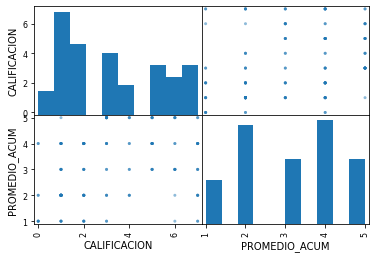

In [12]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data[['CALIFICACION', 'PROMEDIO_ACUM']])
plt.show()

In [13]:
lista_atrib_binarios = ['GENERO','ASISTENCIA']
lista_atrib_multi_clase =['EDAD','TIPO_UNIVERSIDAD',
        'HRS SEMANAL','FREQ LECTURA','PREP EX1',
        'PREP_EX2','NOTAS_CLASE','ESCUCHA','DISCUSION_PROF',
        'UTILIDAD_CLASE','PROMEDIO_ACUM','CURSO']

from sklearn.compose import ColumnTransformer         
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
procesador = ColumnTransformer([
    ('bi',OrdinalEncoder(),lista_atrib_binarios),
    ('multi',OneHotEncoder(), lista_atrib_multi_clase)
])

In [14]:
X_train_preparados = procesador.fit_transform(X_train)
X_test_preparados = procesador.transform(X_test)

In [15]:
X_train_preparados.shape

(108, 48)

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier  

In [3]:
r_forest = RandomForestClassifier()
r_sgd = SGDClassifier(random_state=42)

In [19]:
r_forest.fit(X_train_preparados, y_train)
r_sgd.fit(X_train_preparados, y_train)

SGDClassifier(random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score

score_forest = np.sqrt(-cross_val_score(r_forest, X_train_preparados, y_train, cv = 10,
                               scoring = 'neg_mean_squared_error'))

score_sgd = np.sqrt(-cross_val_score(r_sgd, X_train_preparados, y_train, cv = 5,
                               scoring = 'neg_mean_squared_error'))
                               


In [21]:
print(score_forest.mean(),score_sgd.mean())

1.3266977355452823 2.1804153080459767


In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(r_sgd, X_train_preparados, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 2,  1,  2,  1,  1,  0,  0,  1],
       [ 1, 15,  4,  2,  1,  3,  1,  0],
       [ 0,  5,  5,  5,  5,  0,  0,  0],
       [ 0,  2,  2,  4,  0,  4,  1,  1],
       [ 0,  1,  3,  3,  0,  0,  0,  1],
       [ 0,  1,  1,  2,  1,  2,  0,  1],
       [ 1,  0,  0,  1,  0,  0,  4,  4],
       [ 0,  0,  1,  2,  1,  1,  4,  4]])

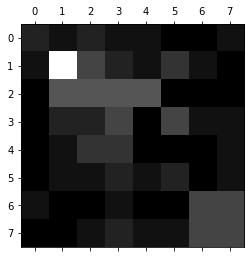

In [23]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [24]:
grid_param ={
    'bootstrap': [True, False],
 'max_depth': [10, 20, 30, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20]
 }

grid_search = GridSearchCV(r_forest, grid_param, cv = 10, scoring = 'neg_mean_squared_error',\
                          return_train_score = True)

grid_search.fit(X_train_preparados, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
mejor_modelo=grid_search.best_estimator_

In [26]:
score_forest_mejor = np.sqrt(-cross_val_score(mejor_modelo, X_train_preparados, y_train, cv = 10,
                               scoring = 'neg_mean_squared_error'))
print(score_forest_mejor.mean())
mejor_modelo.score(X_train_preparados,y_train)

1.290626981413708


0.8466601306904069

In [27]:
X_test_prep = procesador.transform(X_test)
from sklearn.metrics import mean_squared_error 
data_test_predicciones = mejor_modelo.predict(X_test_prep)
np.sqrt(mean_squared_error(y_test, data_test_predicciones))

1.7131646894315686

In [29]:
from sklearn.neighbors import KNeighborsClassifier
y_train_win=(y_train>=4)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train.values,y_train_win.values)

KNeighborsClassifier()

In [44]:
some_student=estudiantes.iloc[0]

In [45]:
knn_clf.predict([some_student])

array([False])

In [32]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train_preparados, y_train_win, cv=3)
f1_score(y_train_win, y_train_knn_pred, average="macro")

0.773886562618957

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train.values, y_train.values)
score_ovr = np.sqrt(-cross_val_score(ovr_clf, X_train, y_train, cv = 5,
                               scoring = 'neg_mean_squared_error'))
print(score_ovr.mean())

2.1221325136810476


In [46]:
ovr_clf.predict([some_student])

array([1])

In [38]:
len(ovr_clf.estimators_)

8

In [39]:
knn_clf1 = KNeighborsClassifier()

In [40]:
knn_clf1.fit(X_train_preparados, y_train)

KNeighborsClassifier()

In [41]:

score_knn = np.sqrt(-cross_val_score(knn_clf, X_train, y_train, cv = 5,
                               scoring = 'neg_mean_squared_error'))
print(score_knn.mean())

1.7189378054082645


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_prediccion = knn_clf1.predict(X_test_preparados)
accuracy_score(y_test, y_prediccion)

0.21621621621621623